#Bank Churn Predictor


#Objective
The objective  is to develop a machine learning model that accurately identifies customers who are likely to churn.

This predictive capability enables the bank to proactively engage at-risk customers, improve customer retention strategies.

We will try to handle the imbalance in the data and train the model to give high accuracy

#Data Source

In [ ]:
#https://github.com/YBI-Foundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv

#importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

#Reading data

In [5]:
df= pd.read_csv("/content/Bank Churn Modelling.csv")

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Describing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#Data visualization

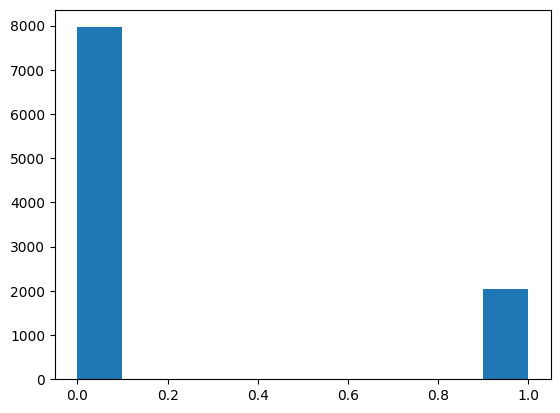

In [9]:
plt.hist(df["Churn"])
plt.show()

In [10]:
df["Churn"].sum()

2037

In [56]:
corr=df.corr()

<Axes: >

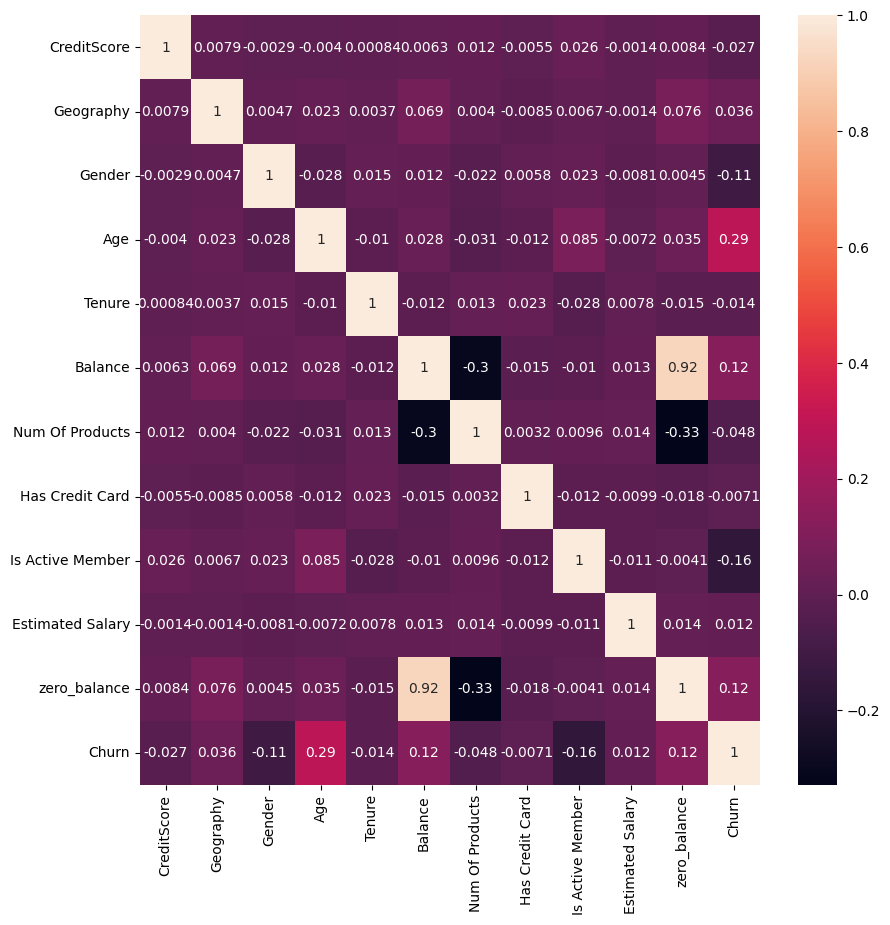

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)


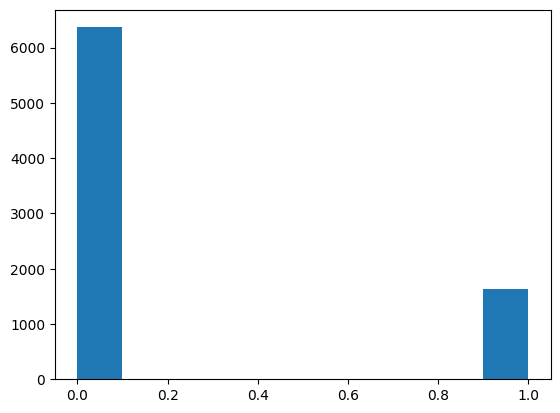

In [58]:
plt.hist(Y_train)
plt.show()

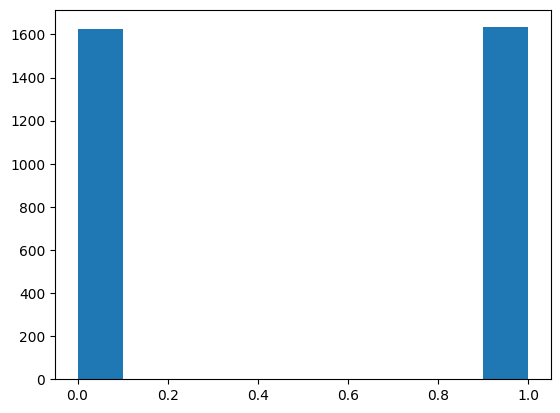

In [59]:
plt.hist(Yru_train)
plt.show()

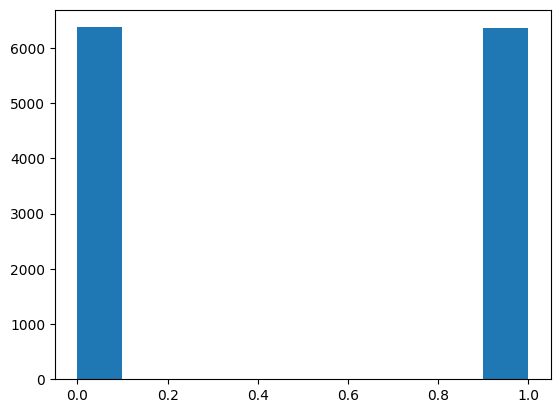

In [60]:
plt.hist(Yro_train)
plt.show()

#Data preprocessing

In [12]:
df.insert(12, 'zero_balance', np.where(df["Balance"] > 0, 1, 0))


In [13]:
df.drop(["Surname","CustomerId"],axis=1,inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,zero_balance,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1,0


In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'zero_balance', 'Churn'],
      dtype='object')

Label enconding

In [16]:
from sklearn.preprocessing import LabelEncoder
le_geo= LabelEncoder()
le_gender=LabelEncoder()
le_numofp= LabelEncoder()


df["Geography"]=le_geo.fit_transform(df["Geography"])
df["Gender"]=le_gender.fit_transform(df["Gender"])
df["Num Of Products"]=le_numofp.fit_transform(df["Num Of Products"])



In [17]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,zero_balance,Churn
0,619,0,0,42,2,0.00,0,1,1,101348.88,0,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,1,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1,1
3,699,0,0,39,1,0.00,1,0,0,93826.63,0,0
4,850,2,0,43,2,125510.82,0,1,1,79084.10,1,0


spliting of data into X-Feature variables,Y-Target variable

In [18]:
X=df.iloc[:,0:11]

Y=df.iloc[:,11]

Y.shape,X.shape


((10000,), (10000, 11))

#Handling the imbalance of data

#Random under sampling

In [17]:
!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.12.3
Uninstalling imbalanced-learn-0.12.3:
  Successfully uninstalled imbalanced-learn-0.12.3


In [15]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.10.1



  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()
X_ru,Y_ru=rus.fit_resample(X,Y)
X_ru.shape,Y_ru.shape

((4074, 11), (4074,))

In [20]:
Y_ru.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

#random over sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()
X_ro,Y_ro=ros.fit_resample(X,Y)
X_ro.shape,Y_ro.shape

((15926, 11), (15926,))

#Train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape


(8000, 11)

#Random under split

In [24]:
Xru_train,Xru_test,Yru_train,Yru_test=train_test_split(X_ru,Y_ru,test_size=0.2,random_state=0)
Xru_train.shape

(3259, 11)

#Random over split


In [25]:
Xro_train,Xro_test,Yro_train,Yro_test=train_test_split(X_ro,Y_ro,test_size=0.2,random_state=0)
Xro_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,zero_balance
10919,674,1,1,34,2,152797.90,0,1,0,175709.40,1
2339,651,1,1,26,5,147037.32,0,0,0,141763.26,1
12854,479,1,1,35,4,138718.92,0,1,1,47251.79,1
125,432,0,1,42,9,152603.45,0,1,0,110265.24,1
15084,350,0,0,40,0,111098.85,0,1,1,172321.21,1


#Scaling


#Normal

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train[["CreditScore","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_train[["CreditScore","Age","Balance","Estimated Salary"]])
X_test[["CreditScore","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_test[["CreditScore","Age","Balance","Estimated Salary"]])


#for random under sampling

In [27]:
Xru_train[["CreditScore","Age","Balance","Estimated Salary"]]=sc.fit_transform(Xru_train[["CreditScore","Age","Balance","Estimated Salary"]])
Xru_test[["CreditScore","Age","Balance","Estimated Salary"]]=sc.fit_transform(Xru_test[["CreditScore","Age","Balance","Estimated Salary"]])

#for random over sampling

In [28]:
Xro_train[["CreditScore","Age","Balance","Estimated Salary"]]=sc.fit_transform(Xro_train[["CreditScore","Age","Balance","Estimated Salary"]])
Xro_test[["CreditScore","Age","Balance","Estimated Salary"]]=sc.fit_transform(Xro_test[["CreditScore","Age","Balance","Estimated Salary"]])

#Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
c=LogisticRegression()

c.fit(X_train,Y_train)


LogisticRegression()

In [64]:
Yl_pred=c.predict(X_test)


In [65]:
print(classification_report(Y_test,Yl_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.59      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



Random under

In [66]:
cru=LogisticRegression()
cru.fit(Xru_train,Yru_train)

LogisticRegression()

In [67]:
Yru_pred=cru.predict(Xru_test)

In [68]:
print(classification_report(Yru_test,Yru_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       411
           1       0.71      0.72      0.72       404

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



Random over

In [69]:
cro=LogisticRegression()
cro.fit(Xro_train,Yro_train)

LogisticRegression()

In [70]:
Yro_pred=cru.predict(Xro_test)

In [71]:
print(classification_report(Yro_test,Yro_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1590
           1       0.70      0.68      0.69      1596

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186



#RandomForestClassifer

In [72]:
from sklearn.ensemble import RandomForestClassifier
cf=RandomForestClassifier(n_jobs=-1)
cf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [73]:
Yf_pred=cf.predict(X_test)

In [74]:
print(classification_report(Y_test,Yf_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Random under

In [75]:
from sklearn.ensemble import RandomForestClassifier
cfru=RandomForestClassifier(n_jobs=-1)
cfru.fit(Xru_train,Yru_train)

RandomForestClassifier(n_jobs=-1)

In [76]:
Yf_pred_ru=cf.predict(Xru_test)

In [77]:
print(classification_report(Yru_test,Yf_pred_ru))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       411
           1       0.98      0.58      0.73       404

    accuracy                           0.79       815
   macro avg       0.84      0.78      0.78       815
weighted avg       0.84      0.79      0.78       815



Random over

In [78]:
from sklearn.ensemble import RandomForestClassifier
cf_ro=RandomForestClassifier(n_jobs=-1)
cf_ro.fit(Xro_train,Yro_train)

RandomForestClassifier(n_jobs=-1)

In [79]:
Yf_pred_ro=cf.predict(Xro_test)

In [80]:
print(classification_report(Yro_test,Yf_pred_ro))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81      1590
           1       0.98      0.56      0.71      1596

    accuracy                           0.77      3186
   macro avg       0.83      0.77      0.76      3186
weighted avg       0.83      0.77      0.76      3186



#XGboost

In [81]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [82]:
from xgboost import XGBClassifier

In [89]:
clf_xgb =XGBClassifier(n_jobs=-1,n_estimators=100)

clf_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
Y_pred_xgb=clf_xgb.predict(X_test)

In [91]:
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.71      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Random under

In [92]:
clfru_xgb =XGBClassifier(n_jobs=-1,n_estimators=100)

clfru_xgb.fit(Xru_train,Yru_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
Yru_pred_xgb=clf_xgb.predict(Xru_test)

In [94]:
print(classification_report(Yru_test,Yru_pred_xgb))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       411
           1       0.96      0.51      0.67       404

    accuracy                           0.75       815
   macro avg       0.82      0.75      0.73       815
weighted avg       0.81      0.75      0.73       815



Random under

In [95]:
clfro_xgb =XGBClassifier(n_jobs=-1,n_estimators=100)

clfro_xgb.fit(Xro_train,Yro_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
Yro_pred_xgb=clf_xgb.predict(Xro_test)

In [97]:
print(classification_report(Yro_test,Yro_pred_xgb))

              precision    recall  f1-score   support

           0       0.67      0.97      0.80      1590
           1       0.95      0.53      0.68      1596

    accuracy                           0.75      3186
   macro avg       0.81      0.75      0.74      3186
weighted avg       0.81      0.75      0.74      3186



#support vector machine

In [29]:
from sklearn.svm import SVC

clf=SVC()

clf.fit(X_train,Y_train)



SVC()

In [30]:
Y_pred=clf.predict(X_test)


In [31]:
clf.score(X_train,Y_train)

0.818625

In [32]:
clf.score(X_test,Y_test)

0.821

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(Y_test,Y_pred))

[[1592    3]
 [ 355   50]]


hypert paramter tunning

In [34]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1595
           1       0.94      0.12      0.22       405

    accuracy                           0.82      2000
   macro avg       0.88      0.56      0.56      2000
weighted avg       0.84      0.82      0.76      2000



In [35]:
from sklearn.model_selection import GridSearchCV
param={ 'C':[0.1,1,10],
       'gamma':[1,0.1,0.01],
        'class_weight':['balanced']}
clf_grid=GridSearchCV(SVC(),param,verbose=2,cv=2)

clf_grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   1.4s
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   1.4s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   1.9s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   1.6s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   1.2s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   1.2s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   1.4s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   1.4s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   1.0s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   1.0s
[CV] END .............C=1, class_weight=balanced, gamma=0.01; total time=   1.1s
[CV] END .............C=1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [36]:
print(clf_grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [37]:
grid_y=clf_grid.predict(X_test)

In [38]:
print(classification_report(Y_test,grid_y))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1595
           1       0.51      0.46      0.48       405

    accuracy                           0.80      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.79      0.80      0.80      2000



#model for random under sampling

In [39]:
clf_ru=SVC()


In [40]:
clf_ru.fit(Xru_train,Yru_train)

SVC()

In [41]:
Yru_pred=clf_ru.predict(Xru_test)


In [42]:
confusion_matrix(Yru_test,Yru_pred)

array([[298, 113],
       [100, 304]])

In [43]:
print(classification_report(Yru_test,Yru_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       411
           1       0.73      0.75      0.74       404

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



Hyper parameter tuning


In [44]:
clf_ru_grid=GridSearchCV(SVC(),param,verbose=2,cv=2)

clf_ru_grid.fit(Xru_test,Yru_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   0.0s
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   0.0s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   0.0s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   0.0s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   0.0s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   0.0s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   0.0s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   0.0s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   0.0s
[CV] END .............C=1, class_weight=balanced, gamma=0.01; total time=   0.0s
[CV] END .............C=1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [45]:
Yru_grid=clf_ru_grid.predict(Xru_test)

In [46]:
print(classification_report(Yru_test,Yru_grid))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       411
           1       0.74      0.74      0.74       404

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



#model for random over sampling

In [47]:
clf_ro=SVC()

In [48]:
clf_ro.fit(Xro_train,Yro_train)

SVC()

In [49]:
Yro_pred=clf_ro.predict(Xro_test)

In [50]:
confusion_matrix(Yro_test,Yro_pred)

array([[1214,  376],
       [ 398, 1198]])

In [51]:
print(classification_report(Yro_test,Yro_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1590
           1       0.76      0.75      0.76      1596

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



Hyper tuning

In [52]:
clf_ro_grid=GridSearchCV(SVC(),param,verbose=2,cv=2)
clf_ro_grid.fit(Xro_train,Yro_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   3.9s
[CV] END ..............C=0.1, class_weight=balanced, gamma=1; total time=   5.8s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   2.9s
[CV] END ............C=0.1, class_weight=balanced, gamma=0.1; total time=   2.9s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   3.8s
[CV] END ...........C=0.1, class_weight=balanced, gamma=0.01; total time=   3.7s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   3.2s
[CV] END ................C=1, class_weight=balanced, gamma=1; total time=   3.1s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   3.3s
[CV] END ..............C=1, class_weight=balanced, gamma=0.1; total time=   2.9s
[CV] END .............C=1, class_weight=balanced, gamma=0.01; total time=   2.8s
[CV] END .............C=1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [53]:
Yro_grid=clf_ro_grid.predict(Xro_test)

In [54]:
print(confusion_matrix(Yro_test,Yro_grid))

[[1460  130]
 [  36 1560]]


In [55]:
print(classification_report(Yro_test,Yro_grid))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1590
           1       0.92      0.98      0.95      1596

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



#Explanation:-
we first handled the imbalance which is present in the data as the number of customers who are churing is relatively low

so we randomundersampler first to create sample with lower size than the original

then we used the randomoversampler to create extra samples than the original


we then used multiple models to check the accuracy:-
1)logistic regression
2)randomforestclassifier
3)XGBclassifier
4)SVM with and without hyper tunning

it was found at the end that SVM with grid when trained with random over sample provided the highest accuracy of 95% and recall of 98%

the other models can also be hypertunned which we will leave for further exploration and expandation